# Phase 2 Results Analysis

In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from Test_Functions import plotsteps,plotreward,plotdata,ReadCSV
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline
experiements = pd.read_csv('Final.csv')
experiements.details.fillna(value='n',inplace=True)

experiements['tr_SMD']=0.0
experiements['tr_SM']=0.0
experiements['tr_RMD']=0.0
experiements['tr_RM']=0.0

experiements['ts_SMD']=0.0
experiements['ts_SM']=0.0
experiements['ts_RMD']=0.0
experiements['ts_RM']=0.0

experiements = experiements[experiements.experiment==348]

for i in experiements.experiment:
    print(i)
    train,test,splitpoint= ReadCSV(i,experiements[experiements.experiment==i].vanish.as_matrix()[0])
    indx = experiements[experiements['experiment']==i].index[0]
    train = train[train[0]>=splitpoint]
    test = test[test[0]>=(splitpoint/10)]
    experiements.set_value(indx,'tr_SMD',train[1].median())
    experiements.set_value(indx,'tr_SM',train[1].mean())
    experiements.set_value(indx,'tr_RMD',train[2].median())
    experiements.set_value(indx,'tr_RM',train[2].mean())

    experiements.set_value(indx,'ts_SMD',test[1].median())
    experiements.set_value(indx,'ts_SM',test[1].mean())
    experiements.set_value(indx,'ts_RMD',test[2].median())
    experiements.set_value(indx,'ts_RM',test[2].mean())

In [4]:
experiements.to_csv('Final.csv',index=False)

In [5]:
experiements.head()

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,...,ts_AR,ts_AS,tr_SMD,tr_SM,tr_RMD,tr_RM,ts_SMD,ts_SM,ts_RMD,ts_RM
0,1,100000,1,0.001,adam,naive,1000,relu,10,1000000,...,925.861880,75.932541,8.0,13.331520,999.2,996.213907,9.0,24.546375,999.10,982.619989
1,2,100000,1,0.001,adam,naive,1000,relu,10,1000000,...,758.891523,227.170977,10.0,83.472296,999.0,942.921128,11.0,172.223333,998.90,819.444333
2,3,100000,1,0.001,adam,naive,1000,tanh,10,1000000,...,784.640647,205.626582,12.0,167.225936,998.8,878.330882,13.0,255.786667,998.70,727.754667
3,4,100000,1,0.001,adam,naive,1000,tanh,10,1000000,...,766.953540,221.316372,13.0,155.606832,998.7,895.619441,13.5,255.611111,998.65,727.525309
4,5,100000,1,0.001,adam,avg,1000,relu,10,1000000,...,837.767183,155.724589,8.0,25.357621,999.2,989.154550,10.0,59.431174,999.00,944.461741


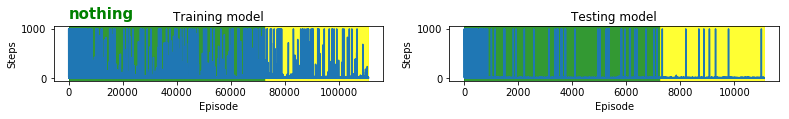

In [12]:
plt.figure(figsize=(13,1))
plotsteps(347,1,2,0,'nothing',0.75)

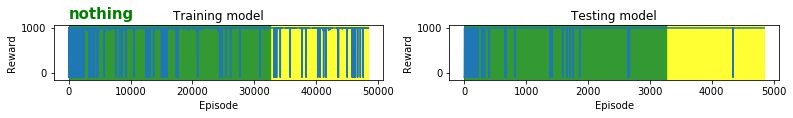

In [7]:
plt.figure(figsize=(13,1))
plotreward(110,1,2,0,'nothing',0.75)

In [7]:
def plotsomething(ax,value):
    tmp1 = experiements[value].unique()
    tmp2 = experiements[value].unique()
    if isinstance(tmp1[0],str):
        le = LabelEncoder()
        le.fit(tmp1)
        experiements[value] = le.transform(experiements[value])
        tmp1 = le.transform(tmp1)
        
        
    ax.scatter(experiements[value],experiements.tr_AR)
    ax.set_xlabel(value)
    ax.set_ylabel('Average Steps')
    ax.set_title(value.upper())
    ax.xlim= (min(tmp1),max(tmp1))
    ax.set_xticks(tmp1)
    ax.set_xticklabels(tmp2,rotation=70)
    
    return ax

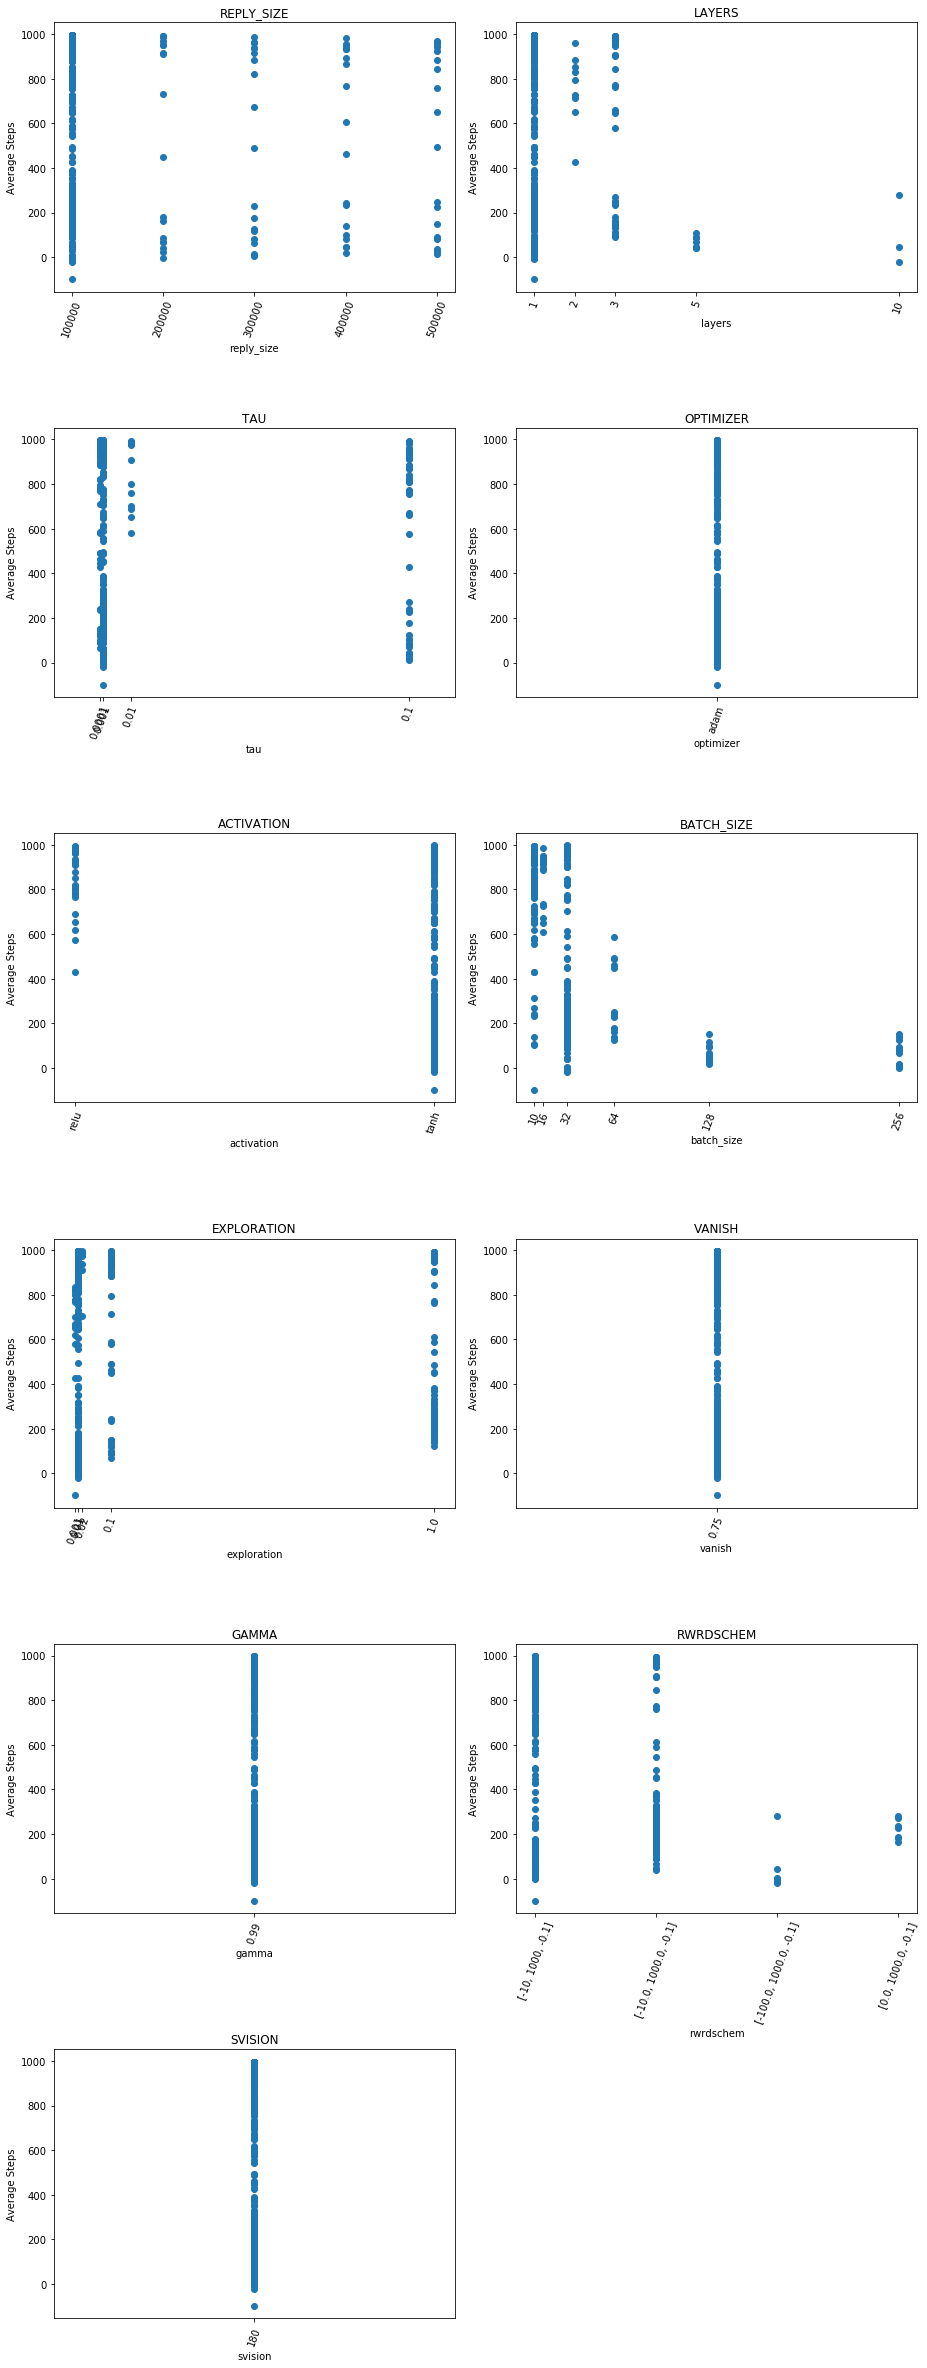

In [8]:
features = experiements.columns[[1,2,3,4,7,8,10,11,12,17,18]]
counter =1
plt.figure(figsize=(13,33))
for i in features:
    ax = plt.subplot(6,2,counter)
    counter+=1
    plotsomething(ax,i)
plt.tight_layout()

total_time=0
for i in experiements.experiment:
    #if i>183:
    #    continue
    print(i)
    dataset = pd.read_csv("{}/exp_details.csv".format(i),header=None)
    total_time+= dataset[3].sum()
total_time/3600/24

In [6]:
pd.options.display.max_columns=40

In [236]:
#experiements = experiements[(experiements.experiment>250)&(experiements.experiment<267)]
#experiements = experiements[experiements.experiment>234]
#experiements= experiements[experiements['details'].str.contains('punishment')]
#experiements = experiements[(experiements.experiment==25)|(experiements.experiment==259)]

## Correlation between Training And testing
* <b>Steps: less better</b>
* <b>Reward: more better</b>

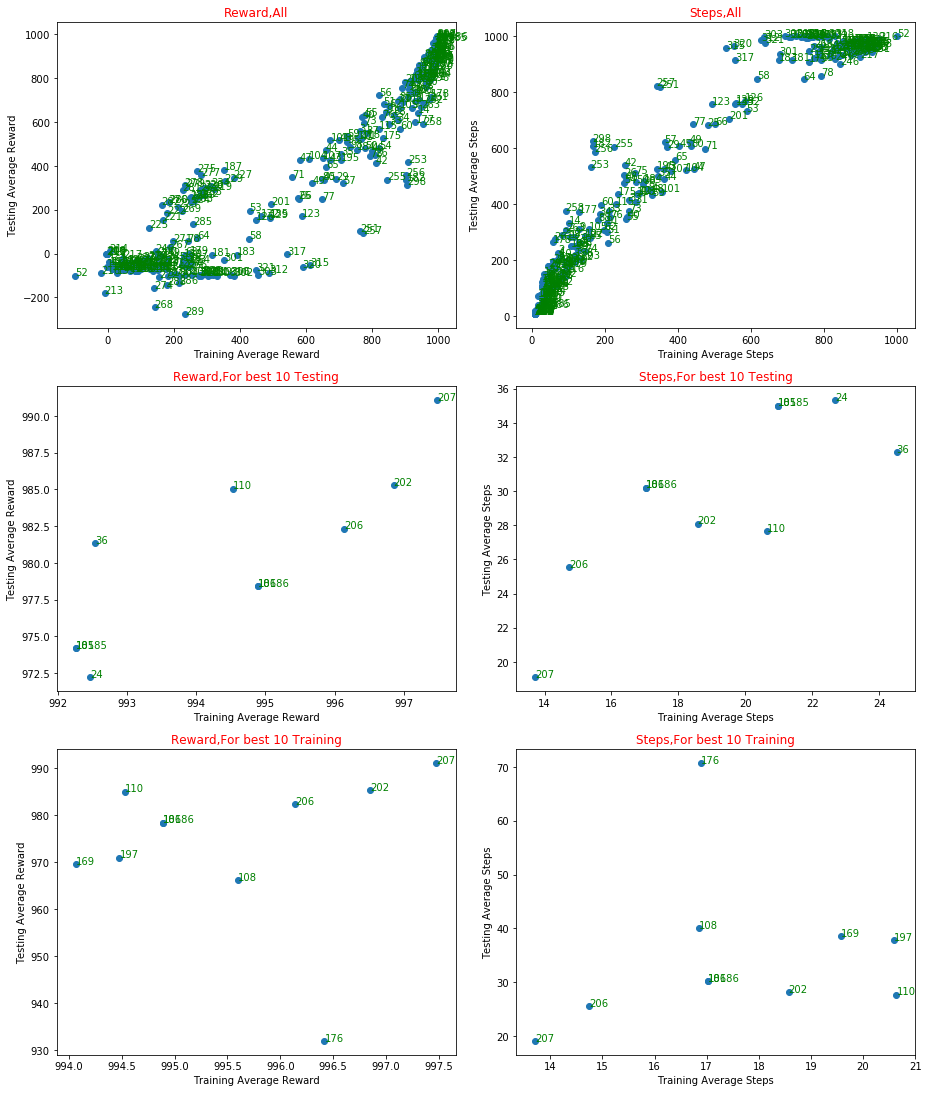

In [238]:
#experiements = experiements[experiements.experiment>68]
plt.figure(figsize=(13,30))
WantedScopes=[]
#All Experiments
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']],'All'))
#Top 10 depending on Average Reward for test
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('ts_AR',ascending=False).head(10),'For best 10 Testing'))
#Top 10 AR for Training
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('tr_AR',ascending=False).head(10),'For best 10 Training'))
counter=1
for tt,strng in WantedScopes:
    
    ax = plt.subplot(6,2,counter)
    counter+=1
    ax.scatter(tt.tr_AR,tt.ts_AR)
    ax.set_title('Reward,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Reward')
    ax.set_ylabel('Testing Average Reward')
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AR'],tt.iloc[i]['ts_AR']),color='green')
    ax = plt.subplot(6,2,counter)
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AS'],tt.iloc[i]['ts_AS']),color='green')
    ax.scatter(tt.tr_AS,tt.ts_AS)
    ax.set_title('Steps,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Steps')
    ax.set_ylabel('Testing Average Steps')
    
    counter +=1
plt.tight_layout()
plt.show()

## Best Average Training Reward
* Each row represent the an experiement that contain at least 10K episode.

In [5]:
experiements.columns

Index(['experiment', 'reply_size', 'layers', 'tau', 'optimizer', 'advantage',
       'max_steps', 'activation', 'batch_size', 'totalsteps', 'exploration',
       'vanish', 'gamma', 'hidden_size', 'train_repeat', 'batch_norm', 'seed',
       'rwrdschem', 'svision', 'details', 'tr_count', 'tr_TR', 'tr_TT',
       'tr_TS', 'ts_count', 'ts_TR', 'ts_TT', 'ts_TS', 'tr_s', 'ts_s', 'tr_AR',
       'tr_AS', 'ts_AR', 'ts_AS'],
      dtype='object')

In [6]:
wantedcolumns = experiements.columns[[0,1,2,3,5,7,8,9,10,13,14,16,19,20,21,24,28,29,30,31,32]]
#wantedcolumns = experiements.columns[[0,28,29]]
wantedcolumns

Index(['experiment', 'reply_size', 'layers', 'tau', 'advantage', 'activation',
       'batch_size', 'totalsteps', 'exploration', 'hidden_size',
       'train_repeat', 'seed', 'details', 'tr_count', 'tr_TR', 'ts_count',
       'tr_s', 'ts_s', 'tr_AR', 'tr_AS', 'ts_AR'],
      dtype='object')

## Best Average Testing Reward
* Each row represent the an experiement that contain at least 10K episode.

In [7]:
experiements.sort_values('ts_AR',ascending=False)[wantedcolumns].head()

,experiment,reply_size,layers,tau,advantage,activation,batch_size,totalsteps,exploration,hidden_size,train_repeat,seed,details,tr_count,tr_TR,ts_count,tr_s,ts_s,tr_AR,tr_AS,ts_AR
221,227,100000,1,0.001,max,tanh,32,500000,0.01,100,1,1111,punishment on meet based on model 187,68090,25945199,6810,0.409855,0.402643,381.042723,7.343296,346.201615
223,229,100000,1,0.001,max,tanh,32,500000,0.01,100,1,5423,punishment on meet based on model 187,62458,22061499,6246,0.383394,0.373679,353.221349,8.005396,330.177073
228,234,100000,1,0.001,max,tanh,32,500000,0.01,100,1,4917,punishment on meet based on model 187,73054,22835799,7306,0.342733,0.339036,312.587935,6.844266,310.285382
220,226,100000,1,0.001,max,tanh,32,500000,0.01,100,1,4917,punishment on meet,72840,21336199,7285,0.325165,0.332464,292.918712,6.864429,301.552780
224,230,100000,1,0.001,max,tanh,32,500000,0.01,100,1,6654,punishment on meet based on model 187,65732,19128999,6574,0.316482,0.323852,291.015016,7.606721,297.505780


# Full parameters Analysis

In [8]:
experiements.columns

Index(['experiment', 'reply_size', 'layers', 'tau', 'optimizer', 'advantage',
       'max_steps', 'activation', 'batch_size', 'totalsteps', 'exploration',
       'vanish', 'gamma', 'hidden_size', 'train_repeat', 'batch_norm', 'seed',
       'rwrdschem', 'svision', 'details', 'tr_count', 'tr_TR', 'tr_TT',
       'tr_TS', 'ts_count', 'ts_TR', 'ts_TT', 'ts_TS', 'tr_s', 'ts_s', 'tr_AR',
       'tr_AS', 'ts_AR', 'ts_AS'],
      dtype='object')

## episode vs step
* The text above each two plots represent :
    * Experiment ID (1, 2 .....)
    * tau (0.1,0.01,0.001,0001)
    * advantage (naive , avg , max)
    * activation ( relu , tanh)
    * Exploration (0.1, 0.01, 0.001)
    * seed (1337 , 4917)
* Used colors in the plots
    * <b>blue</b> the line color
    * <b>Green</b> part is done in exploration
    * <b>Yellow</b> part is done without exploration

In [9]:
experiements[experiements.tr_count==experiements.tr_count.max()]

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,exploration,vanish,gamma,hidden_size,train_repeat,batch_norm,...,svision,details,tr_count,tr_TR,tr_TT,tr_TS,ts_count,ts_TR,ts_TT,ts_TS,tr_s,ts_s,tr_AR,tr_AS,ts_AR,ts_AS
228,234,100000,1,0.001,adam,max,1000,tanh,32,500000,0.01,0.75,0.99,100,1,False,...,180,punishment on meet based on model 187,73054,22835799,4879,500001,7306,2266945,522,49548,0.342733,0.339036,312.587935,6.844266,310.285382,6.781823


In [10]:
experiements = experiements.sort_values('ts_AR',ascending=False).head(5).reset_index(drop=True)

In [11]:
exp = pd.read_csv('207/exp_details.csv',header=None)
exp = exp[exp[7]=='Test']
exp = exp[exp[0]>13000]
exp = exp[exp[2]<-50]
exp

,0,1,2,3,4,5,6,7
153878,13989,1000,-100.0,3.855134,450,0,0,Test
154241,14022,1000,-100.0,3.334390,213,0,0,Test


In [12]:
fff = experiements[experiements.experiment==275]
x = fff.shape[0]
y = 2
z=0
print(x,y,z)
plt.figure(figsize=(13,x))
for i in fff.experiment.as_matrix():
    txt = fff[fff.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=fff.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotsteps(i,x,y,z,txt,vanish)
    z+=2
#plt.tight_layout()

0 2 0


34 2 0


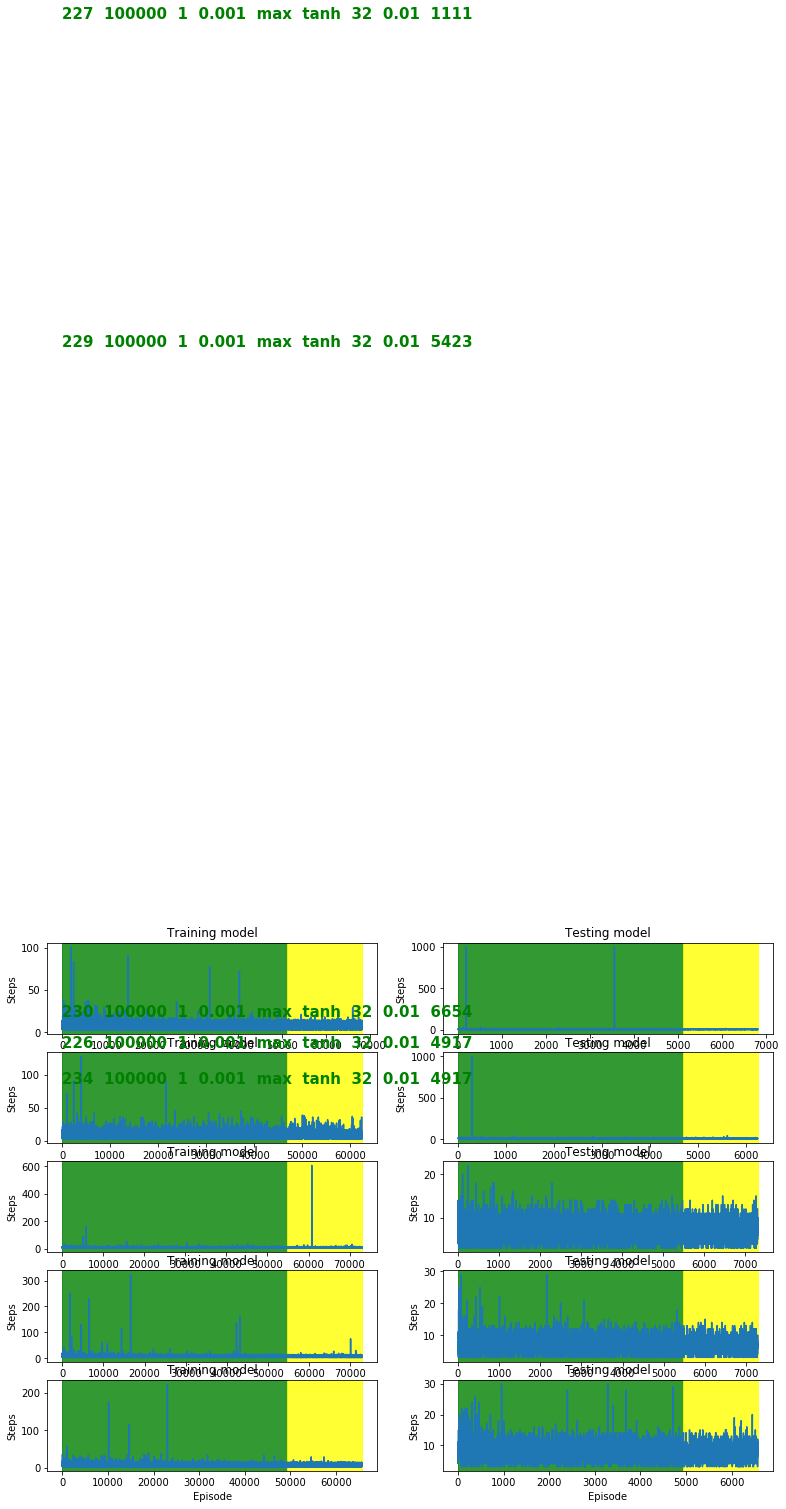

In [13]:
x = experiements.shape[1]
y = 2
z=0
print(x,y,z)
plt.figure(figsize=(13,x*2))
for i in experiements.experiment.as_matrix():
    txt = experiements[experiements.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=experiements.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotsteps(i,x,y,z,txt,vanish)
    z+=2
#plt.tight_layout()

## episode vs reward

In [4]:
x = experiements.shape[0]
y = 2
z=0
plt.figure(figsize=(13,x*2))
for i in experiements.experiment.as_matrix():
    txt = experiements[experiements.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=experiements.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotreward(i,x,y,z,txt,vanish)
    z+=2
plt.tight_layout()
plt.savefig('pic.png')

ValueError: Lengths must match to compare